## Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, classification_report

In [5]:
df = pd.read_csv('Cancer_Data.csv', na_values='?')

# Understanding the data

In [6]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Deleting the column Unnamed, since it all containes nullable data

In [9]:
df = df.drop(columns = ['id','Unnamed: 32'])
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

## Defining a function for comparison between Malignant and Bening cancer based on the feature

In [15]:
def plot_comparison(feature, group1, group2, bins):
    plt.figure(figsize=(20,10))

    if group1['diagnosis'].unique()[0] == 'M':
        m_class = group1
        b_class = group2
    else:
        b_class = group1
        m_class = group2

    plt.subplot(2,2,1)
    ax1 = sns.histplot(data=b_class, x=f'{feature}_mean', bins=bins, kde=True)
    ax1.set_title(f'Mean {feature} - Benign')
    ax1.set_xlabel(None)

    plt.subplot(2,2,2)
    ax2 = sns.histplot(data=m_class, x=f'{feature}_mean', bins=bins, kde=True, color='red')
    ax2.set_title(f'Mean {feature} - Malignant')
    ax2.set_xlabel(None)

    plt.subplot(2,2,3)
    ax3 = sns.histplot(data=b_class, x=f'{feature}_worst', bins=bins, kde=True)
    ax3.set_title(f'Extreme {feature} values - Benign')
    ax3.set_xlabel(None)

    plt.subplot(2,2,4)
    ax4 = sns.histplot(data=m_class, x=f'{feature}_worst', bins=bins, kde=True, color='red')
    ax4.set_title(f'Extreme {feature} values - Malignant')
    ax4.set_xlabel(None)

    plt.show()

In [16]:
b_tumor = df.loc[df['diagnosis'] == 'B']
m_tumor = df.loc[df['diagnosis'] == 'M']

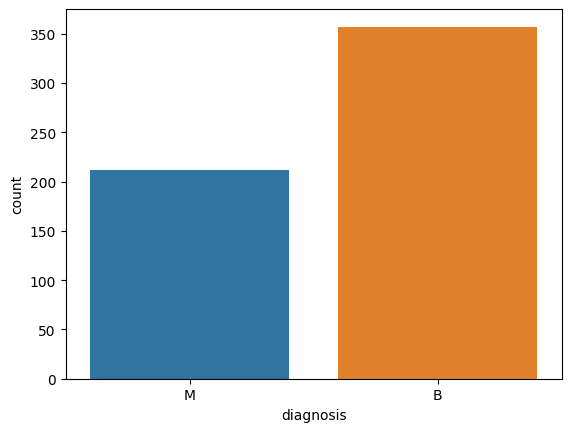

In [17]:
sns.countplot(data=df, x='diagnosis')
plt.show()

## Making the analysis between the 2 types of cancer based on the features present in the dataset

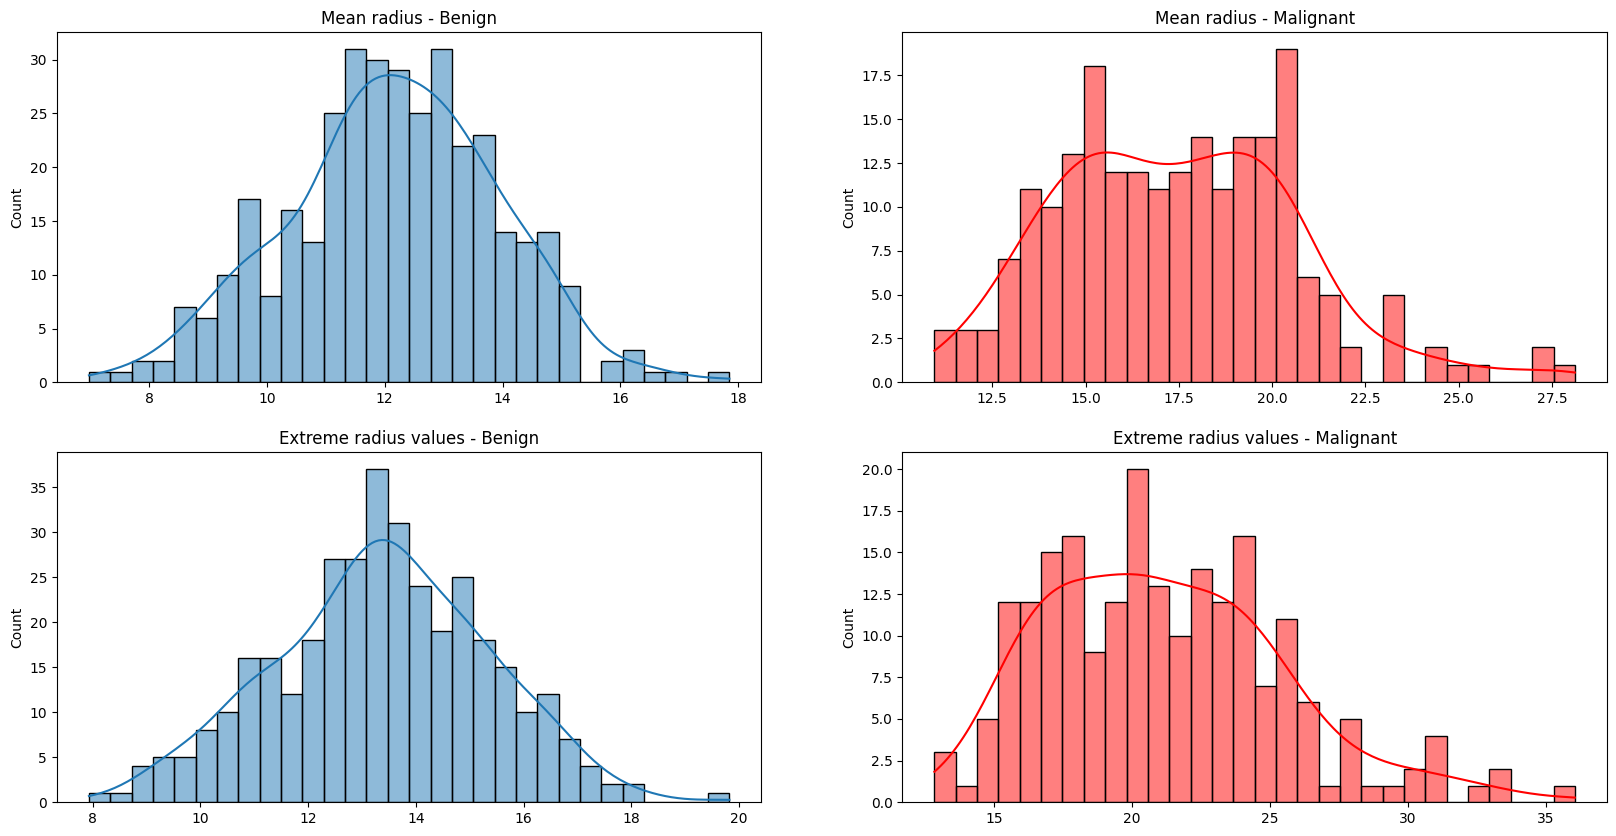

In [18]:
plot_comparison('radius', b_tumor, m_tumor, bins=30)

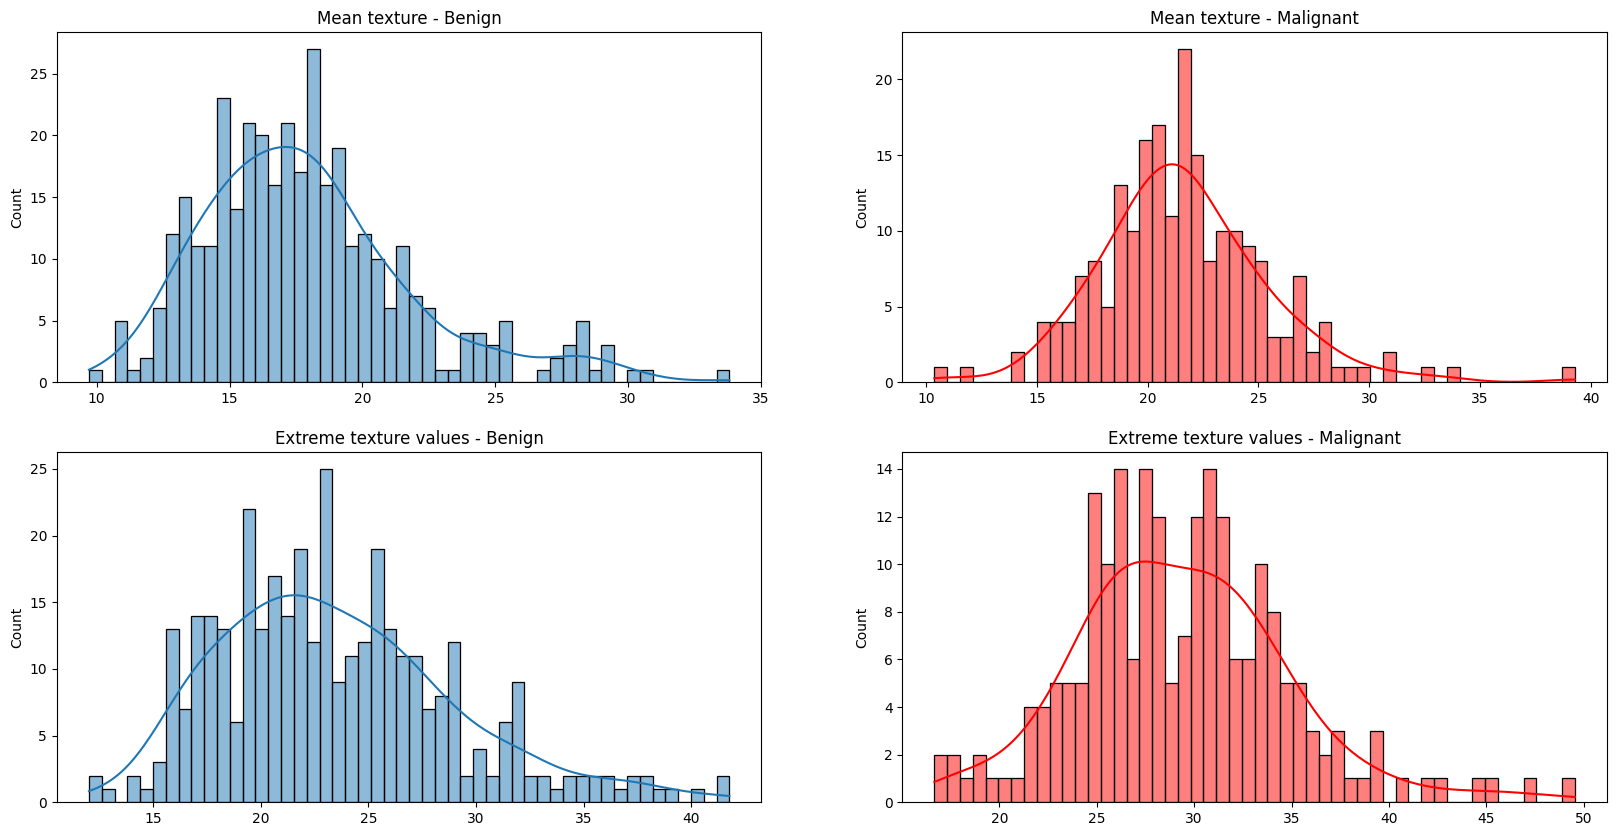

In [19]:
plot_comparison('texture', b_tumor, m_tumor, bins=50)

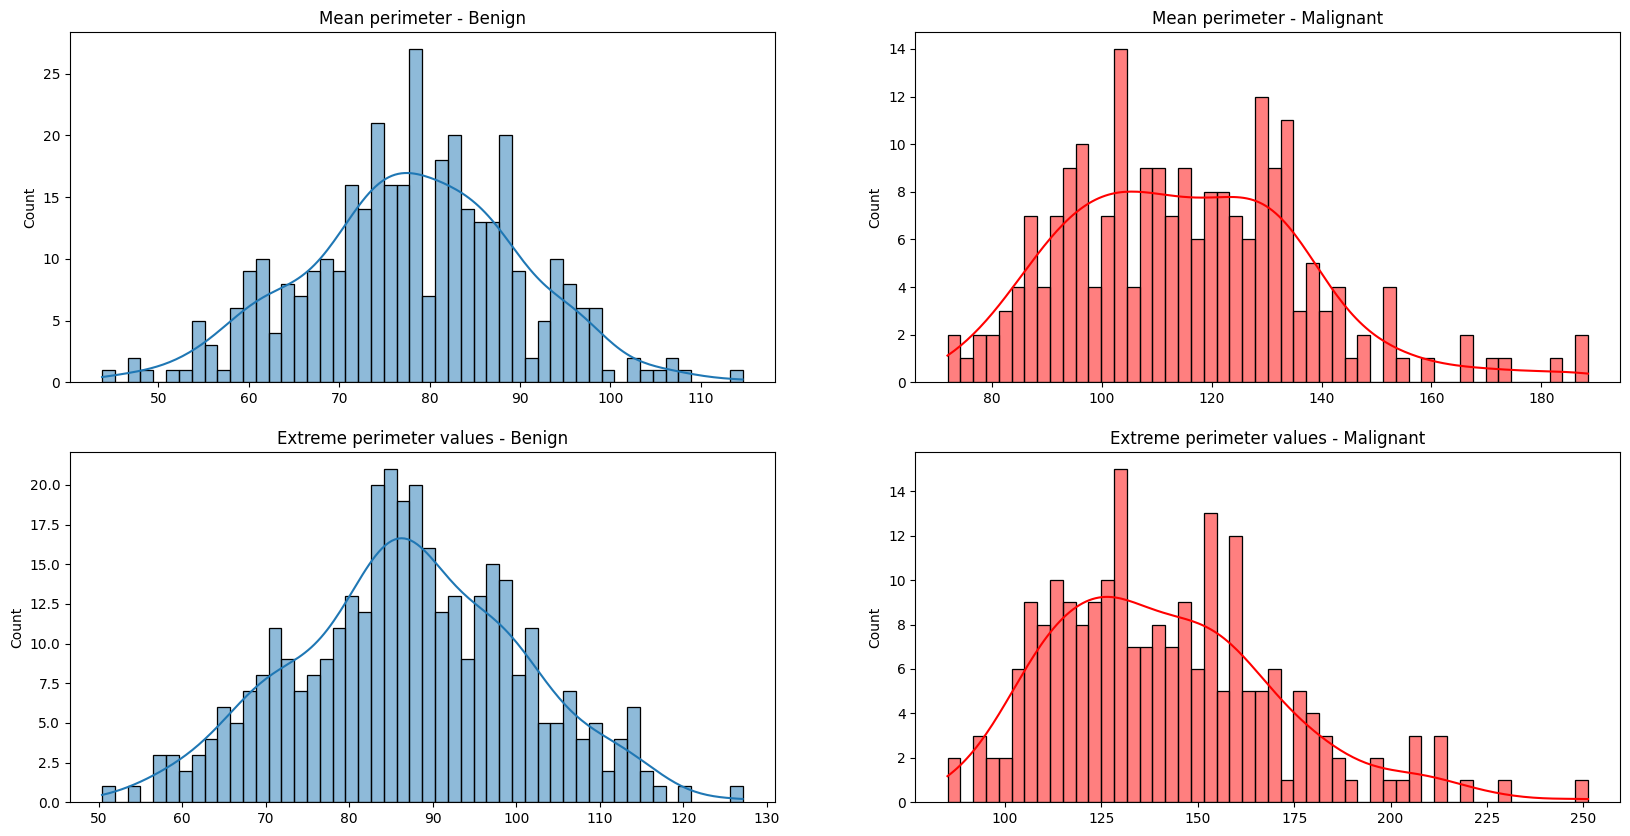

In [20]:
plot_comparison('perimeter', b_tumor, m_tumor, bins=50)

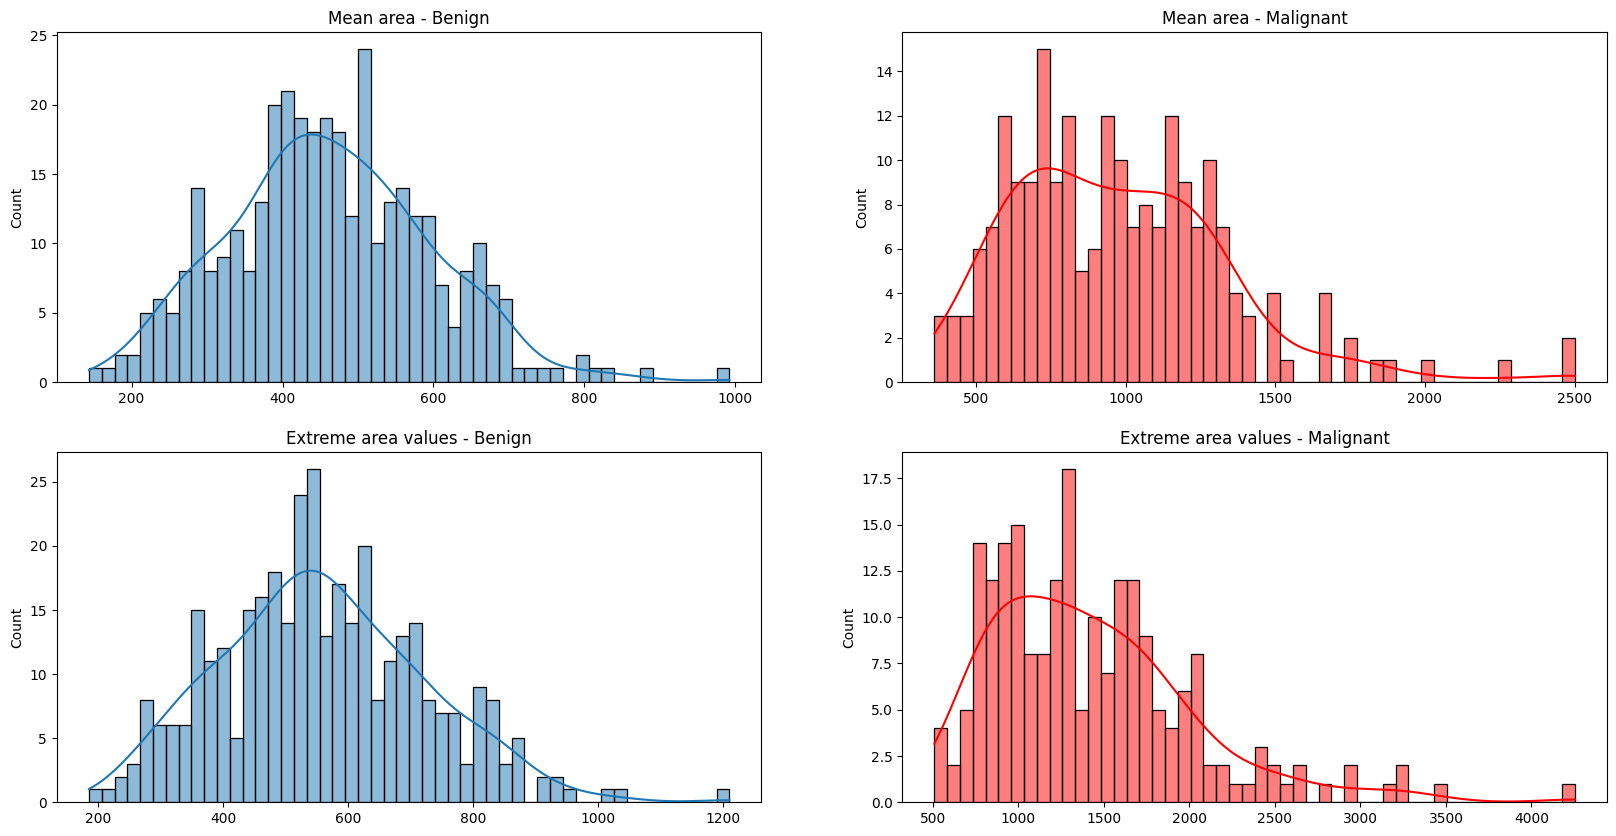

In [21]:
plot_comparison('area', b_tumor, m_tumor, bins=50)

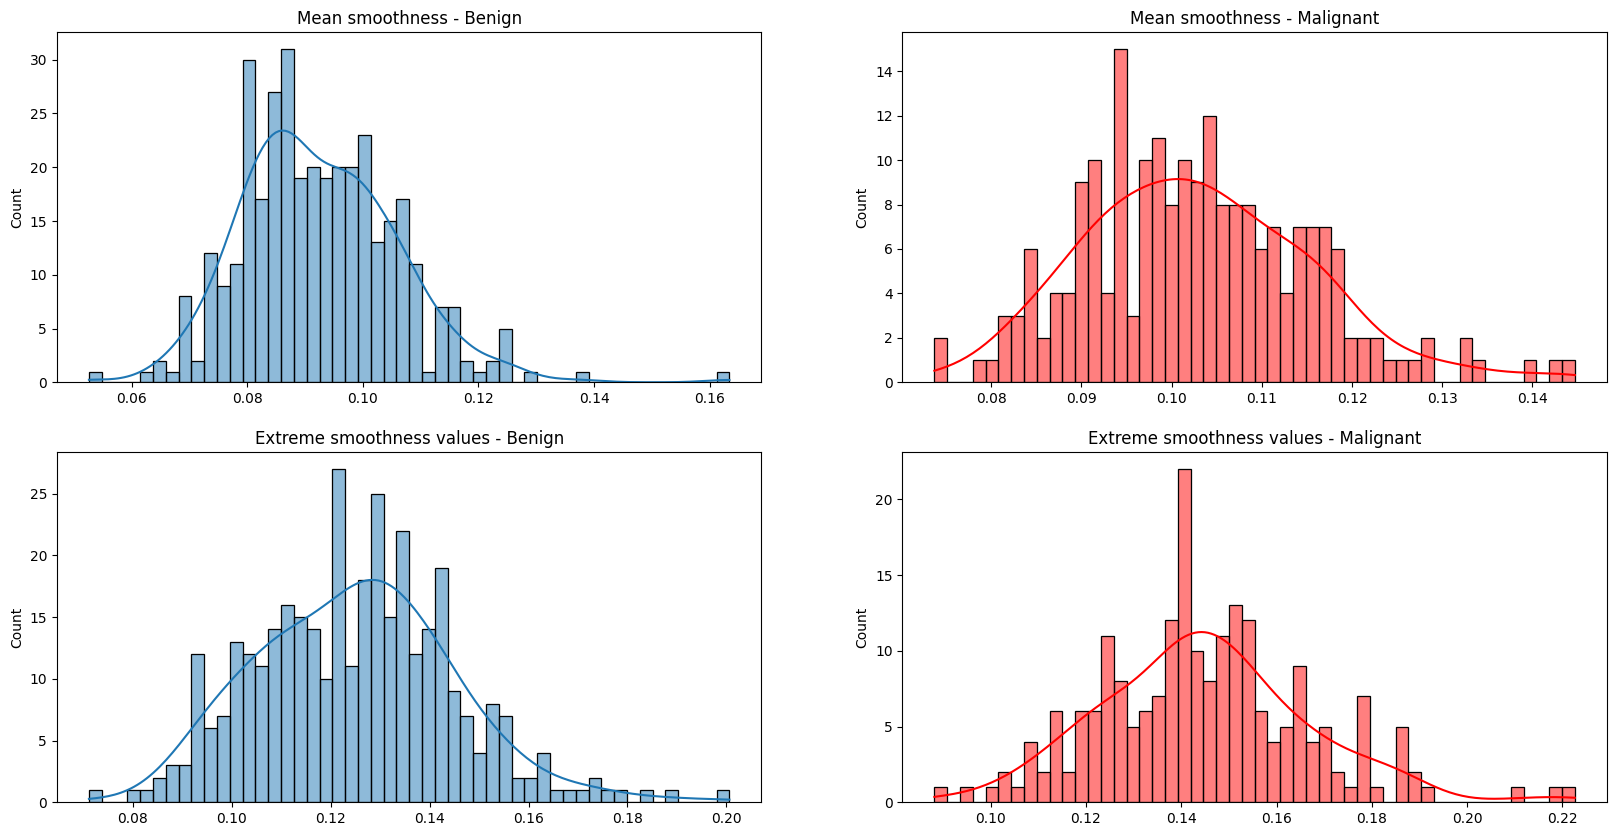

In [22]:
plot_comparison('smoothness', b_tumor, m_tumor, bins=50)

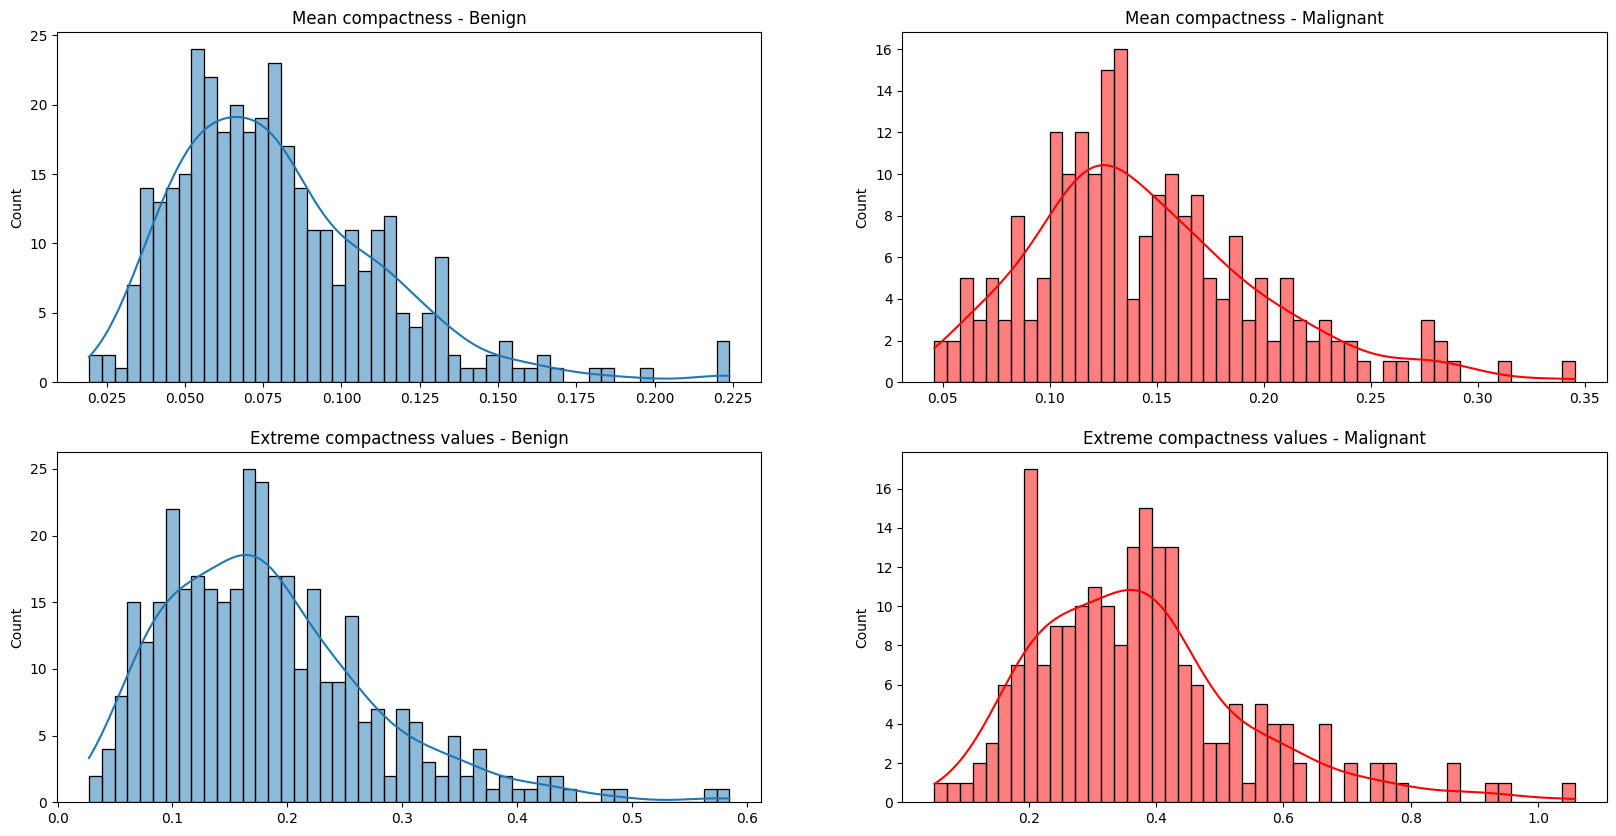

In [23]:
plot_comparison('compactness', b_tumor, m_tumor, bins=50)

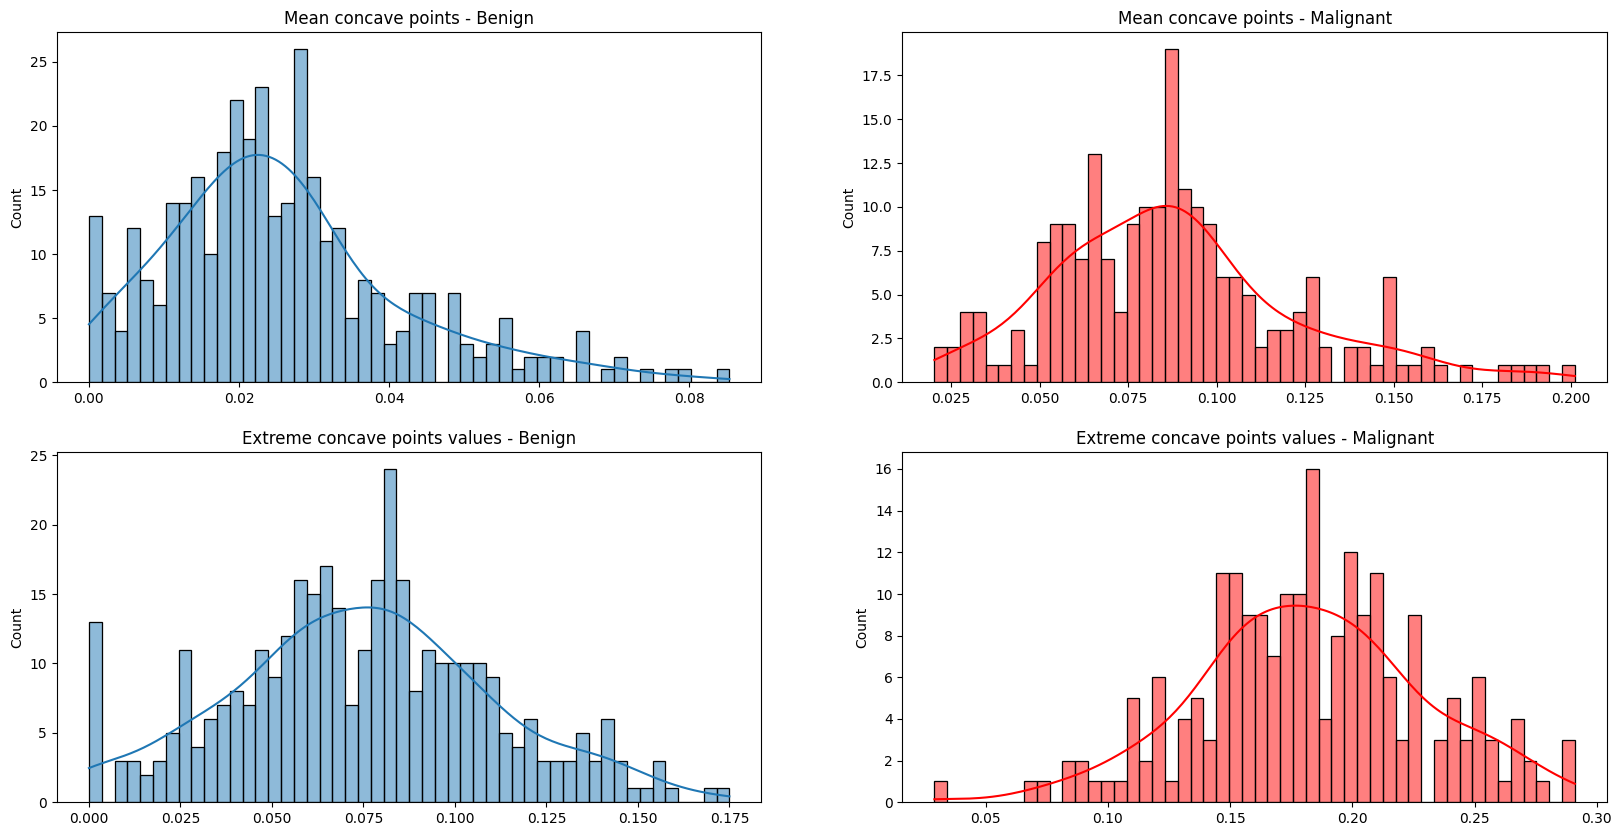

In [24]:
plot_comparison('concave points', b_tumor, m_tumor, bins=50)

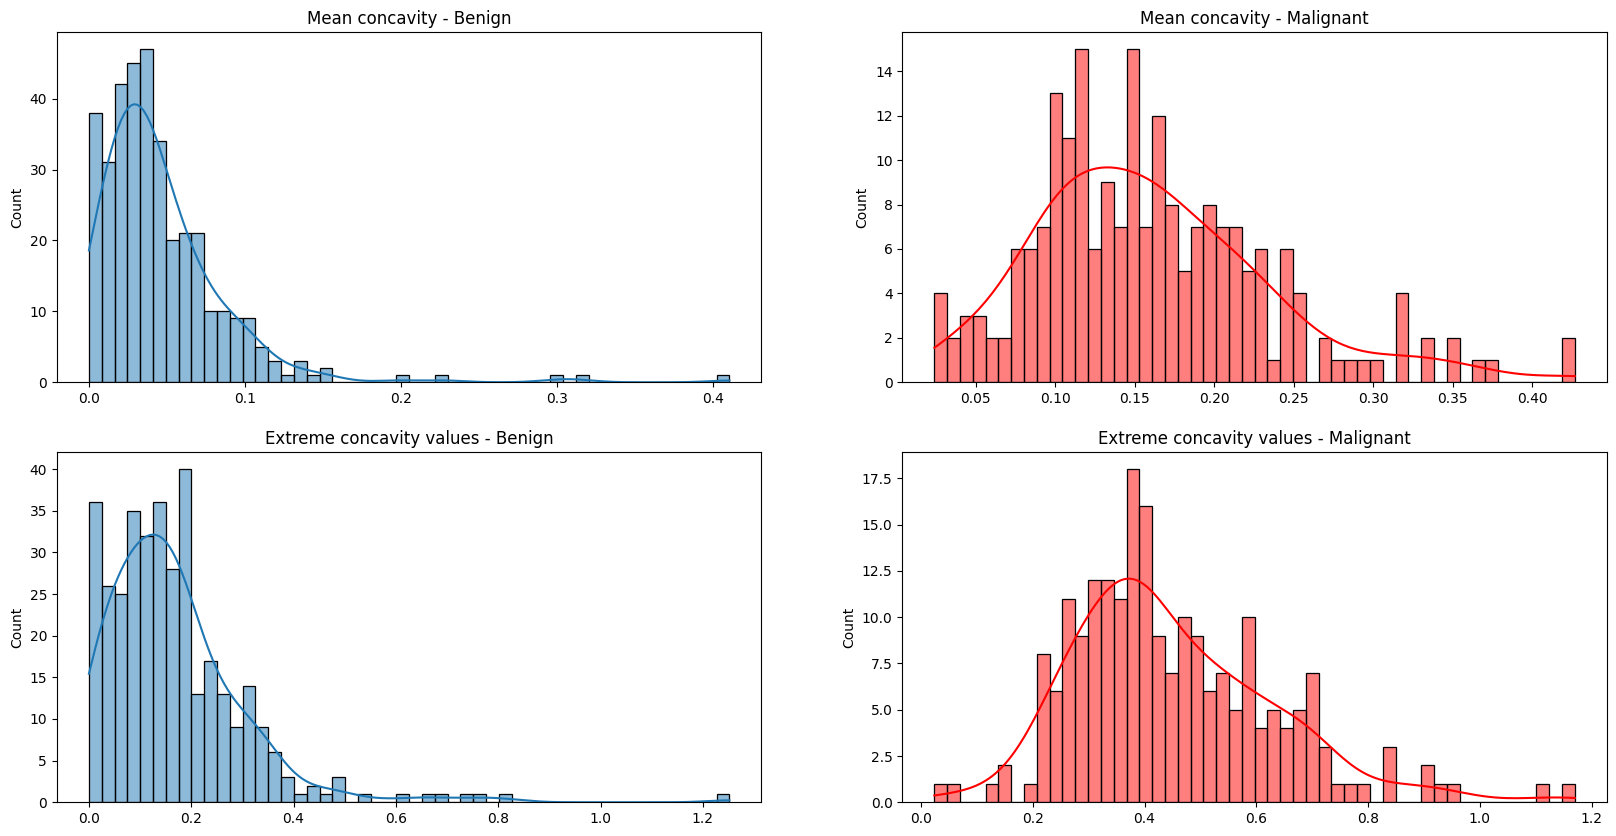

In [25]:
plot_comparison('concavity', b_tumor, m_tumor, bins=50)

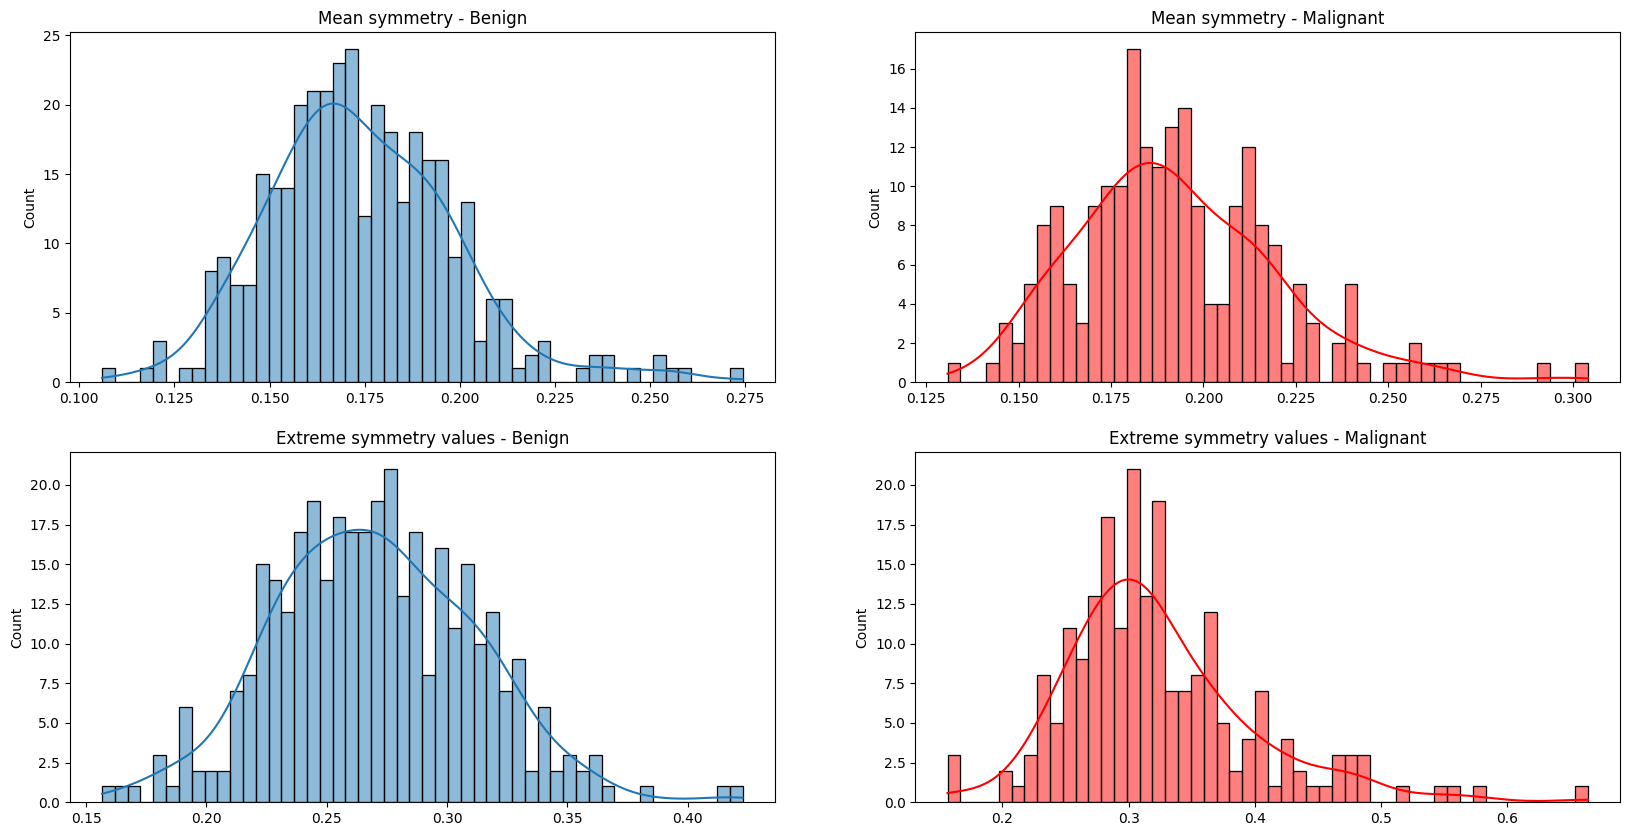

In [26]:
plot_comparison('symmetry', b_tumor, m_tumor, bins=50)

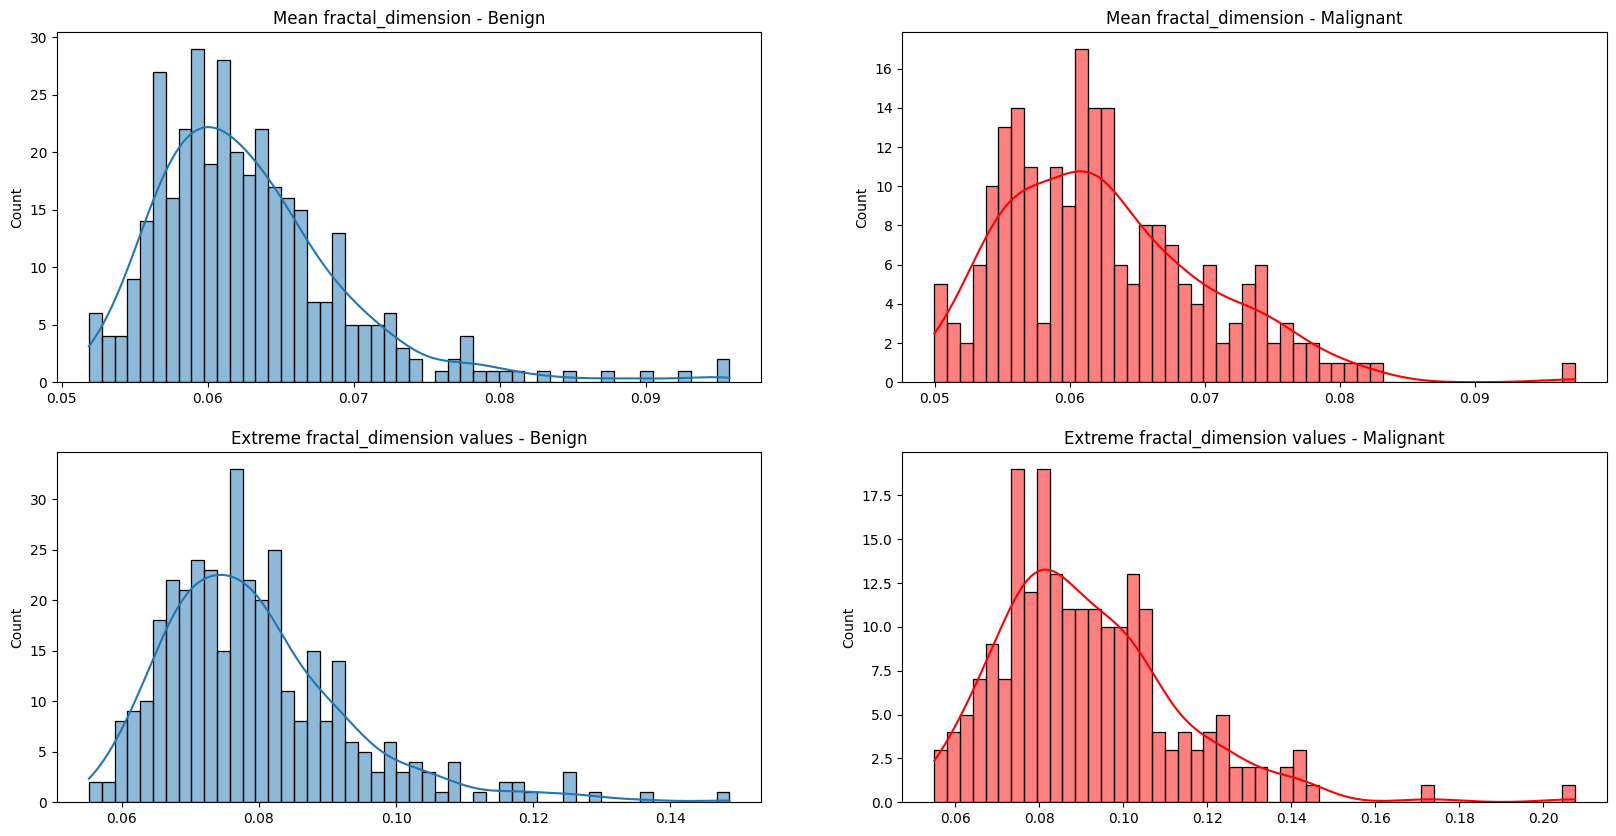

In [27]:
plot_comparison('fractal_dimension', b_tumor, m_tumor, bins=50)

## Defining Malignant(M) as 1; Bening(B) as 0, so that it will be possible to use the dataset for further analysis

In [28]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1 , 'B' : 0})

In [29]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

## Identify and remove outliers

In [30]:
benign_data = df[df['diagnosis'] == 0]
malignant_data = df[df['diagnosis'] == 1]

def remove_outliers(data_frame):
    Q1 = data_frame.quantile(0.25)
    Q3 = data_frame.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = ((data_frame < (Q1 - 1.5 * IQR)) | (data_frame > (Q3 + 1.5 * IQR))).any(axis=1)

    # Remove outliers
    cleaned_data = data_frame[~outliers]

    return cleaned_data

In [31]:
# Remove outliers for benign samples
cleaned_benign_data = remove_outliers(benign_data)

# Remove outliers for malignant samples
cleaned_malignant_data = remove_outliers(malignant_data)

# Concatenate the cleaned datasets back together
cleaned_df = pd.concat([cleaned_benign_data, cleaned_malignant_data])

# Display the summary of the cleaned dataset
print(cleaned_df.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  405.000000   405.000000    405.000000      405.000000   405.000000   
mean     0.372840    14.078906     18.661679       91.288988   642.653580   
std      0.484158     3.110951      3.594187       21.326478   299.627493   
min      0.000000     8.196000      9.710000       51.710000   201.900000   
25%      0.000000    11.840000     16.070000       75.890000   431.900000   
50%      0.000000    13.400000     18.540000       86.100000   551.700000   
75%      1.000000    15.780000     21.250000      103.600000   781.000000   
max      1.000000    24.630000     28.770000      165.500000  1841.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       405.000000        405.000000      405.000000           405.000000   
mean          0.094842          0.093477        0.073836             0.043839   
std           0.012026          0.041225        0.063011       

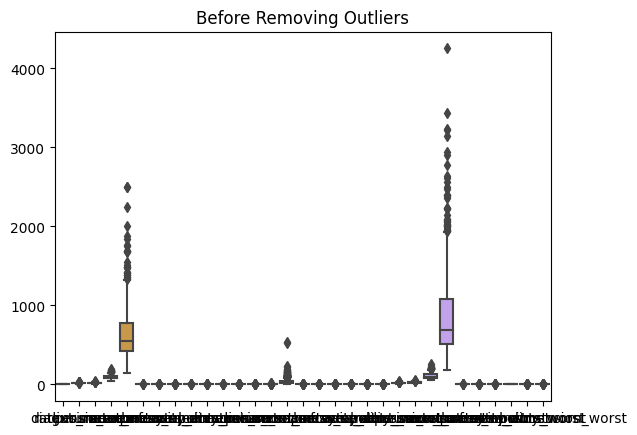

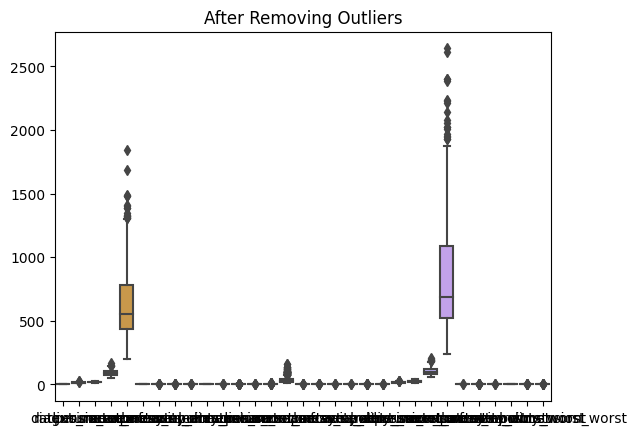

In [32]:
sns.boxplot(data=df)
plt.title('Before Removing Outliers')
plt.show()

# Visualize distribution after removing outliers
sns.boxplot(data=cleaned_df)
plt.title('After Removing Outliers')
plt.show()

In [33]:
df=cleaned_df
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19           0       13.540         14.36           87.46      566.3   
20           0       13.080         15.71           85.63      520.0   
21           0        9.504         12.44           60.34      273.9   
37           0       13.030         18.42           82.61      523.8   
46           0        8.196         16.84           51.71      201.9   
..         ...          ...           ...             ...        ...   
535          1       20.550         20.86          137.80     1308.0   
536          1       14.270         22.55           93.77      629.8   
563          1       20.920         25.09          143.00     1347.0   
564          1       21.560         22.39          142.00     1479.0   
566          1       16.600         28.08          108.30      858.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
19           0.09779           0.08129         0.06664             0.047810   
20           0.10750           0.12700         0.04568             0.031100   
21           0.10240           0.06492         0.02956             0.020760   
37           0.08983           0.03766         0.02562             0.029230   
46           0.08600           0.05943         0.01588             0.005917   
..               ...               ...             ...                  ...   
535          0.10460           0.17390         0.20850             0.132200   
536          0.10380           0.11540         0.14630             0.061390   
563          0.10990           0.22360         0.31740             0.147400   
564          0.11100           0.11590         0.24390             0.138900   
566          0.08455           0.10230         0.09251             0.053020   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
19          0.1885  ...        15.110          19.26            99.70   
20          0.1967  ...        14.500          20.49            96.09   
21          0.1815  ...        10.230          15.66            65.13   
37          0.1467  ...        13.300          22.81            84.46   
46          0.1769  ...         8.964          21.96            57.26   
..             ...  ...           ...            ...              ...   
535         0.2127  ...        24.300          25.48           160.20   
536         0.1926  ...        15.290          34.27           104.30   
563         0.2149  ...        24.290          29.41           179.10   
564         0.1726  ...        25.450          26.40           166.10   
566         0.1590  ...        18.980          34.12           126.70   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
19        711.2           0.14400            0.17730          0.23900   
20        630.5           0.13120            0.27760          0.18900   
21        314.9           0.13240            0.11480          0.08867   
37        545.9           0.09701            0.04619          0.04833   
46        242.2           0.12970            0.13570          0.06880   
..          ...               ...                ...              ...   
535      1809.0           0.12680            0.31350          0.44330   
536       728.3           0.13800            0.27330          0.42340   
563      1819.0           0.14070            0.41860          0.65990   
564      2027.0           0.14100            0.21130          0.41070   
566      1124.0           0.11390            0.30940          0.34030   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
19                0.12880          0.2977                  0.07259  
20                0.07283          0.3184                  0.08183  
21                0.06227          0.2450                  0.07773  
37                0.05013          0.1987                  0.06169  
46                0.02564          0.3105                  0.07409  
..                    .

## Creating a correlation matrix

In [34]:
corr = df.corr()

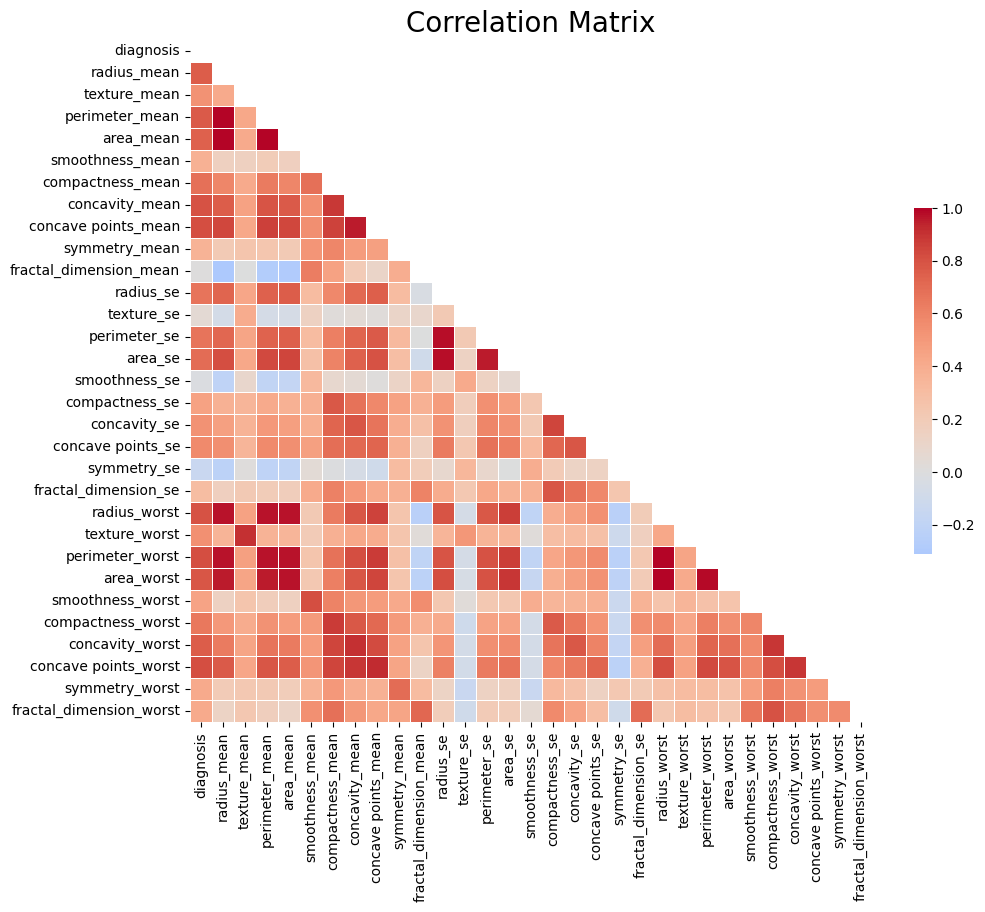

In [35]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)
plt.show()

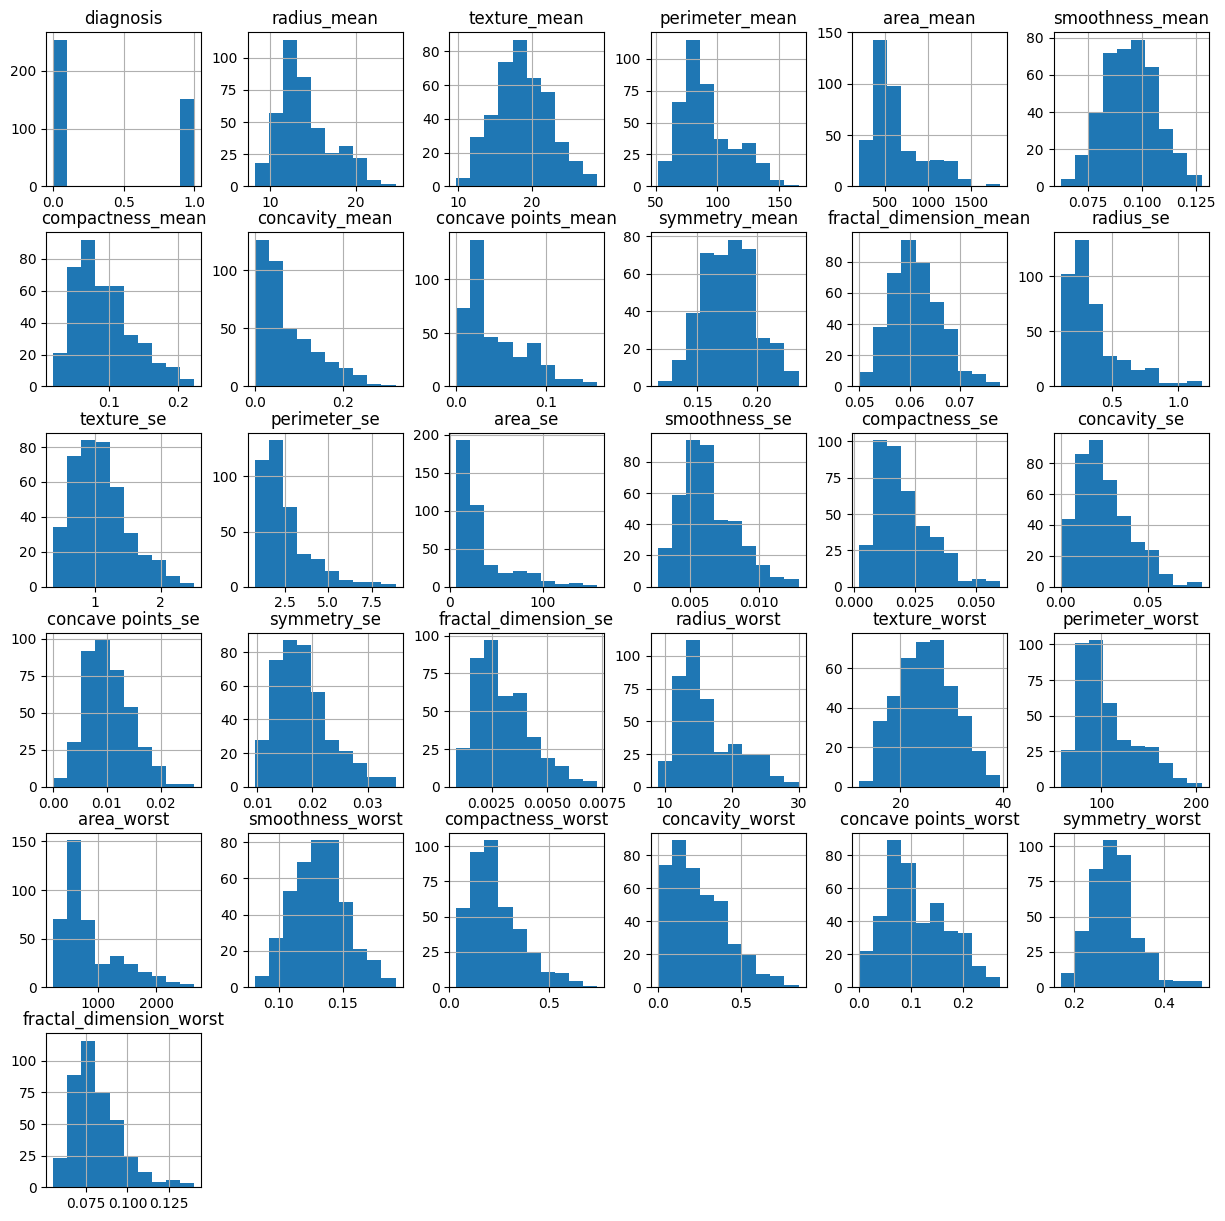

In [36]:
df.hist(figsize=(15, 15))
plt.show()

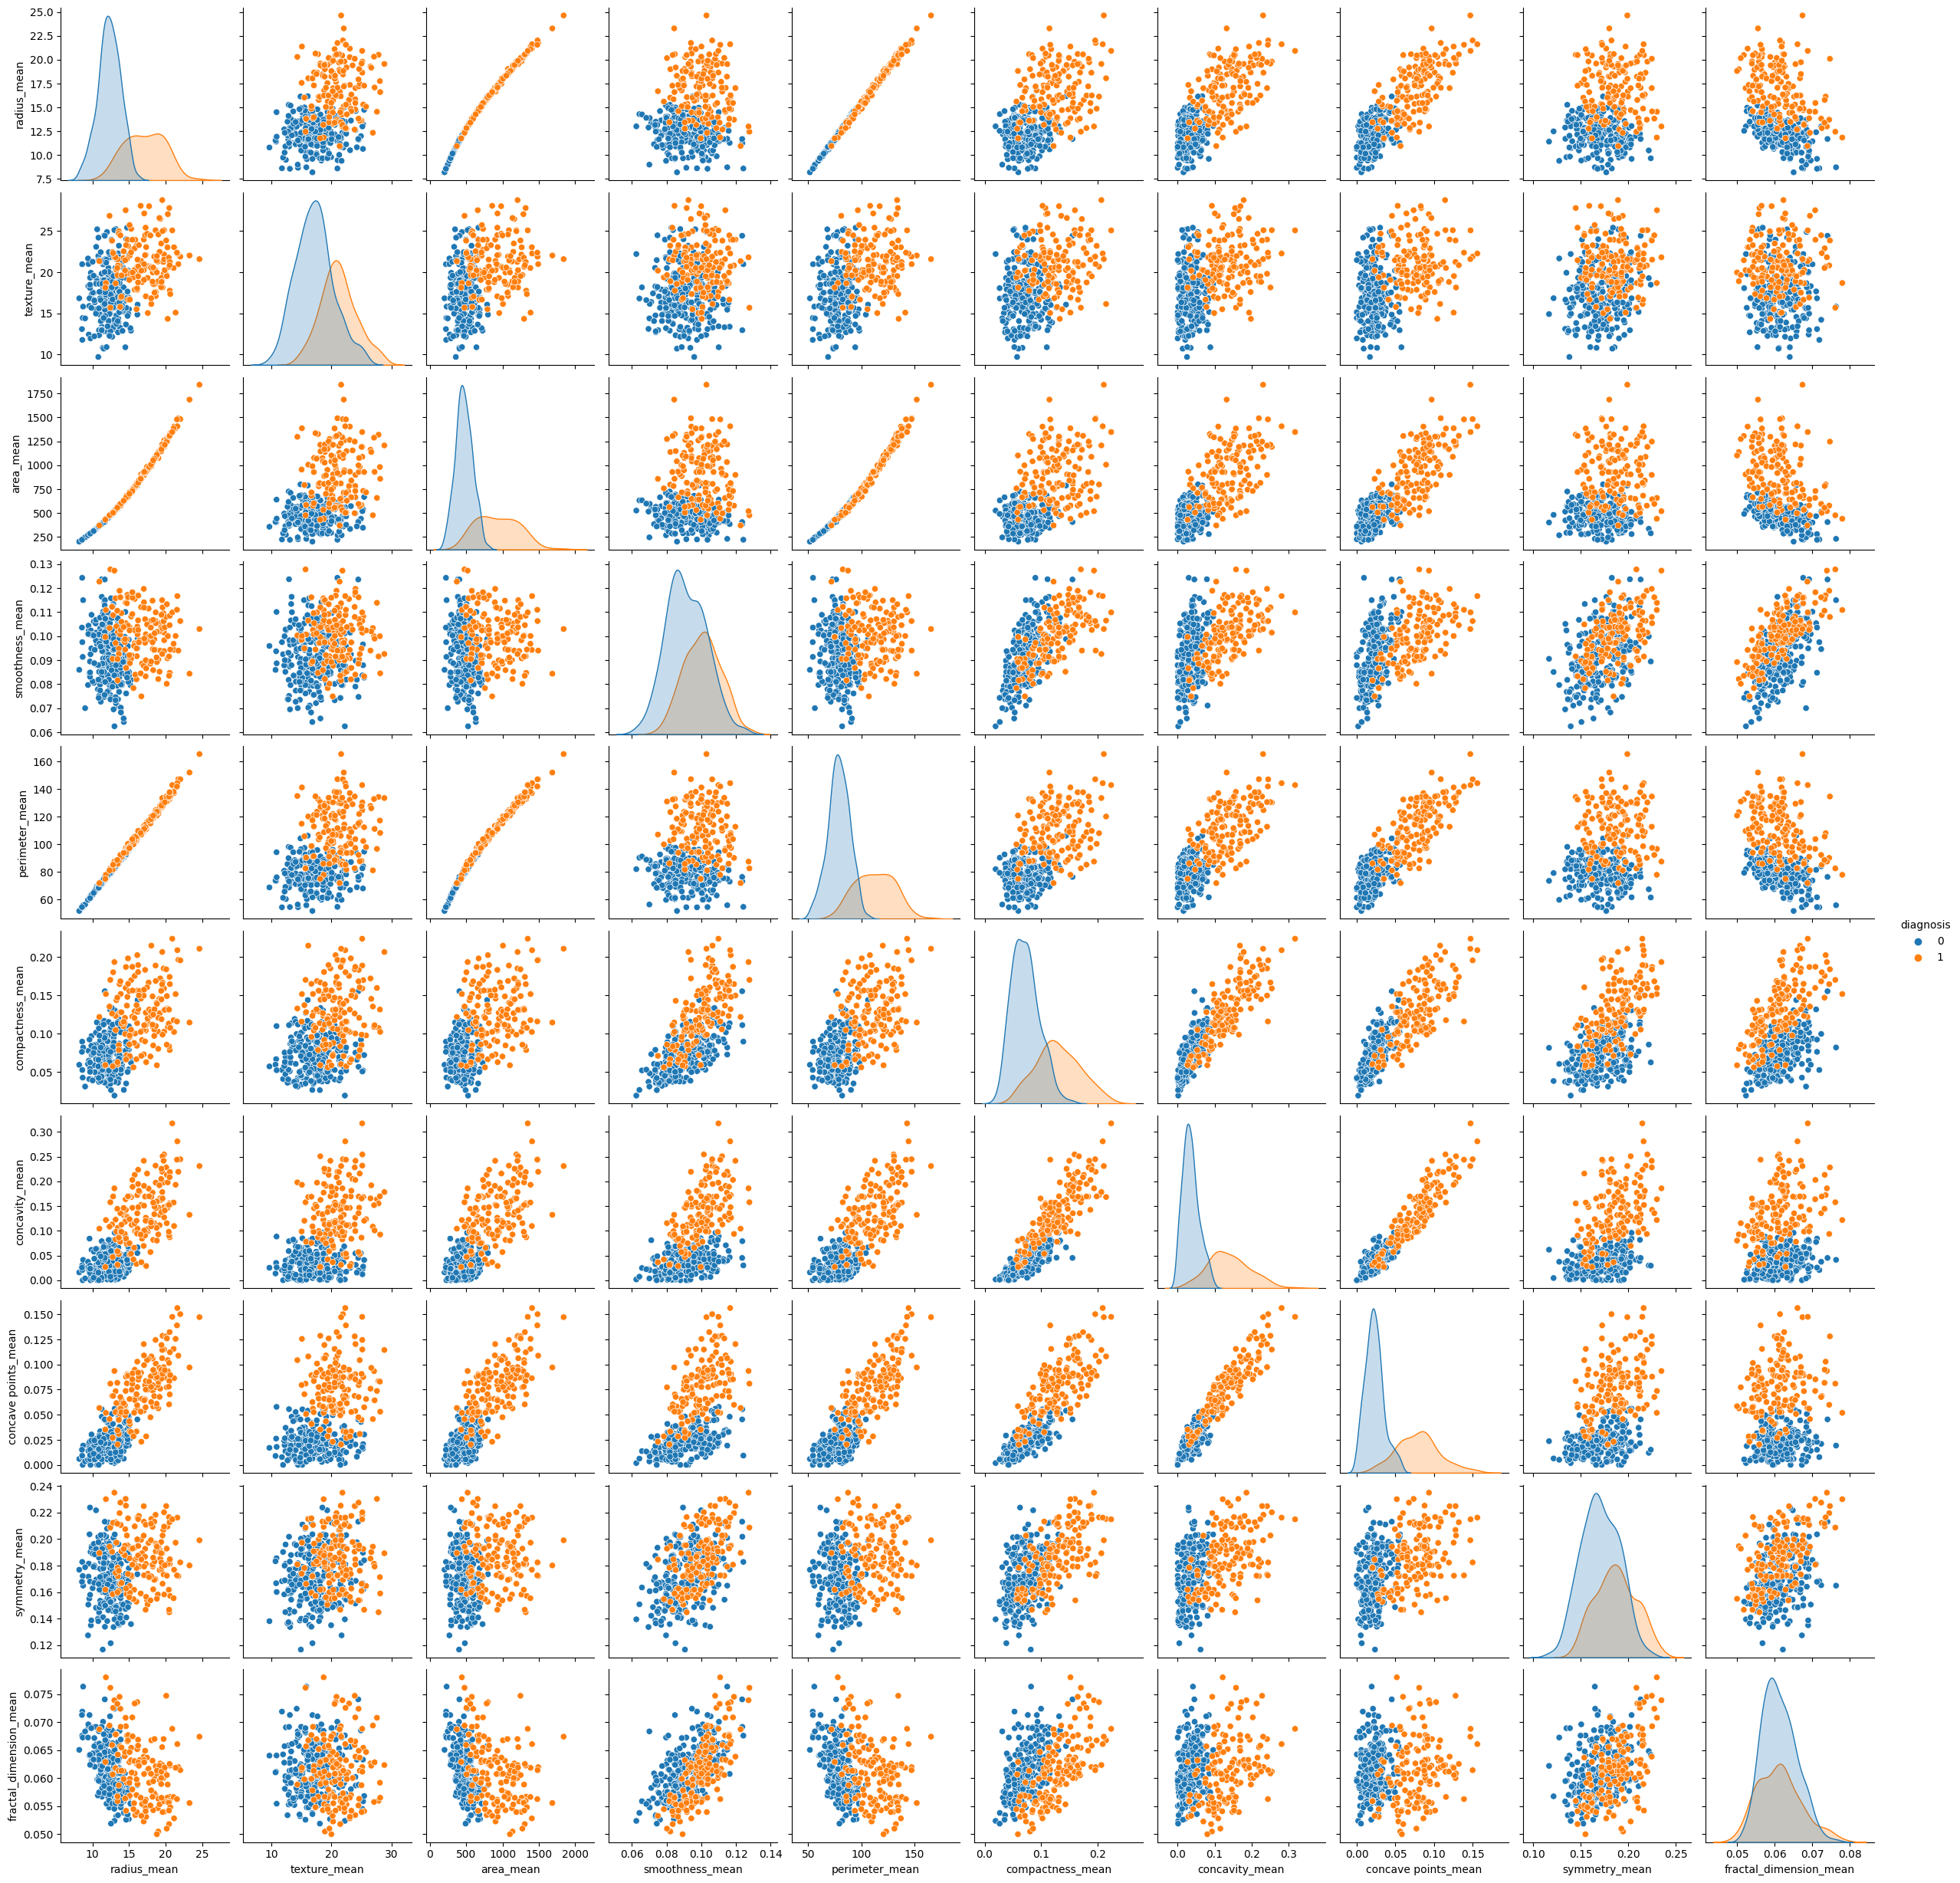

In [37]:
relevant_columns = df[['diagnosis', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'perimeter_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Create pair plot for selected columns
sns.pairplot(relevant_columns, hue='diagnosis')
plt.show()

# Preprocess the data

In [38]:
scaler = preprocessing.StandardScaler()
X = df.drop(columns = 'diagnosis').values
X = scaler.fit_transform(X)
Y = df['diagnosis'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
normalized_x_train = scaler.fit_transform(x_train)
normalized_x_test = scaler.transform(x_test)
normalized_x_train

(324, 30) (81, 30) (324, 1) (81, 1)


array([[ 1.60757014,  2.13723171,  1.61499018, ...,  1.2994599 ,
         0.74683866,  1.10001111],
       [-1.76631659, -1.52120285, -1.72105778, ..., -0.40653469,
         0.2133953 ,  1.63299402],
       [-0.34558178, -0.07950864, -0.41400843, ..., -0.99129909,
        -1.71863955, -1.35793997],
       ...,
       [ 0.14828208,  0.76328628,  0.27489222, ...,  2.68491201,
         2.69827146,  3.19733349],
       [ 1.0308646 ,  1.17790887,  0.90747059, ..., -0.45282784,
        -0.81663533, -1.11844375],
       [-0.37107153, -0.72989701, -0.38933834, ..., -0.06426618,
         0.98349353,  1.00587387]])

### Choosing 2 models: KNN and Decision Tree

In [39]:
models = [KNeighborsClassifier(),
          DecisionTreeClassifier(random_state=42)]
model_names = ['KNN', 'DecisionTree']

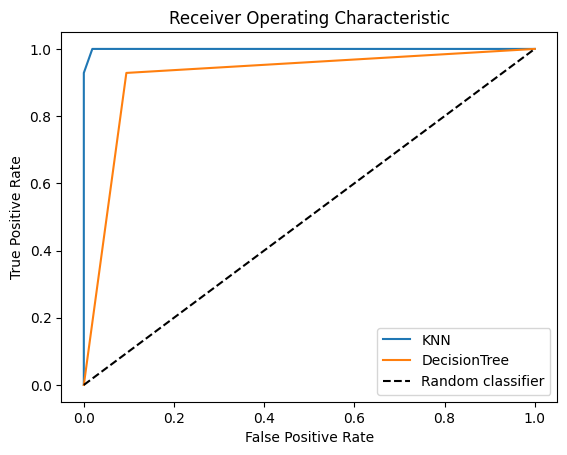

In [40]:
for model, name in zip(models, model_names):
    model.fit(x_train, y_train.ravel())  # Use ravel() to flatten y_train
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred_prob)  # Use ravel() to flatten y_test
    plt.plot(fpr, tpr, label=(name))

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## For both models printing Accuracy, F1-score, Recall and Precision

In [41]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for model, name in zip(models, model_names):
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
    print('%s: Accuracy-score = %0.3f' % (name, accuracy))
    print('%s: F1-score = %0.3f' % (name, f1))
    print('%s: Precision = %0.3f' % (name, precision))
    print('%s: Recall = %0.3f' % (name, recall))
    print('\n')


KNN: Accuracy-score = 0.975
KNN: F1-score = 0.963
KNN: Precision = 1.000
KNN: Recall = 0.929


DecisionTree: Accuracy-score = 0.914
DecisionTree: F1-score = 0.881
DecisionTree: Precision = 0.839
DecisionTree: Recall = 0.929




## As we can see, the KNN model works better, therefore in the next step i'm finding the best parameters for KNN to proceed with further analysis

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

params_knn = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm}

# Create KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV object for KNN
knn_grid = GridSearchCV(estimator=knn, param_grid=params_knn, refit=True, verbose=0, n_jobs=-1)

# Fit the model to the training data
knn_grid.fit(x_train, y_train.ravel())

# Print the best parameters and best score
print(f"Best parameters for KNN: {knn_grid.best_params_}")
print(f"Best score for KNN: {knn_grid.best_score_}")


Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best score for KNN: 0.9660096153846155


## Using the found best parameters for KNN finding cross-validation accuracy scores, mean accuracy and standart deviation of accuracy

In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create KNN classifier with the best parameters
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')

# Define the number of folds
num_folds = 5

# Create StratifiedKFold object to ensure class distribution is similar in each fold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores for each fold
cv_accuracy_scores = cross_val_score(knn, x_train, y_train.ravel(), cv=stratified_kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", cv_accuracy_scores)

# Calculate and print the mean accuracy and its standard deviation
mean_accuracy = cv_accuracy_scores.mean()
std_accuracy = cv_accuracy_scores.std()
print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation of Accuracy: {std_accuracy}")

Cross-Validation Accuracy Scores: [0.96923077 0.93846154 0.98461538 0.96923077 0.9375    ]

Mean Accuracy: 0.9598076923076924
Standard Deviation of Accuracy: 0.018688508635779002


## Creating KNN classifier with the best parameters from the grid search and train the model

In [44]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')

knn.fit(x_train, y_train.ravel())

y_pred = knn.predict(x_test)

Accuracy: 0.9876543209876543
F1 Score: 0.9818181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.96      0.98        28

    accuracy                           0.99        81
   macro avg       0.99      0.98      0.99        81
weighted avg       0.99      0.99      0.99        81



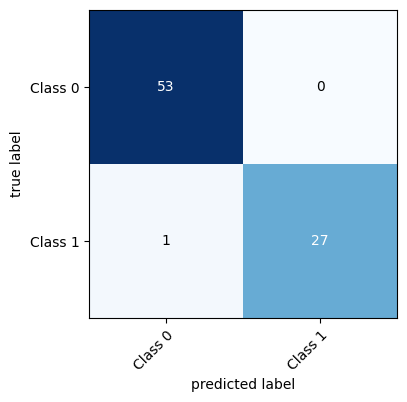

In [45]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), class_names=['Class 0', 'Class 1'])
plt.show()

# Neural Networks

## First NN that I chose is the MLP model with 3 layers. Since I have 2 classes I will be using the activation function sigmoid and for loss: binary-crossentropy

In [52]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense

np.random.seed(42)

# Create MLP model with droupout layers with rate of 0.2
model = Sequential()
model.add(InputLayer(input_shape=normalized_x_train[0].shape))
model.add(Dense(64, activation="relu", name="layer1"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu", name="layer2"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid", name="layer3"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                1984      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 layer2 (Dense)              (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 32)               

In [53]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall])

history = model.fit(normalized_x_train, y_train,
                    epochs = 100,
                    batch_size=5,
                    verbose=0,
                    validation_data=(normalized_x_test, y_test))

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

In [55]:
score = model.evaluate(normalized_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04806942865252495
Test accuracy: 0.9876543283462524


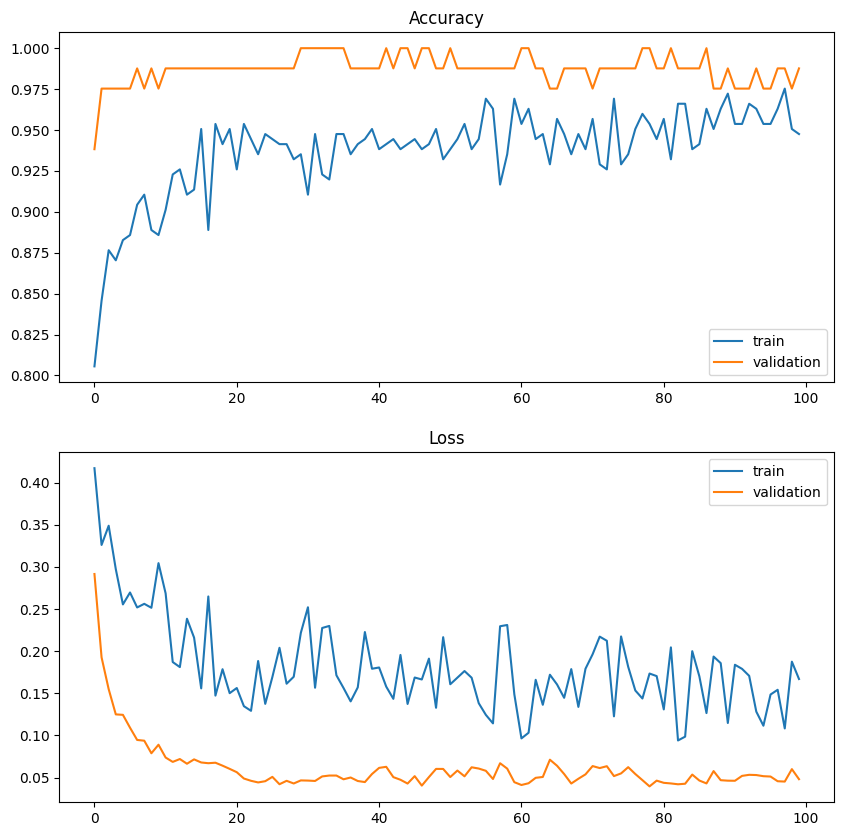

In [56]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend();

## Second NN that i chose is MLP with 5 layers

In [61]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense

#np.random.seed(1337)

# Create MLP model with droupout layers with rate of 0.3
model2 = Sequential()
model2.add(InputLayer(input_shape=normalized_x_train[0].shape))
model2.add(Dense(256, activation="relu", name="layer1"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(128, activation="relu", name="layer2"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(64, activation="relu", name="layer3"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(32, activation="relu", name="layer4"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(1, activation="sigmoid", name="layer5"))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 256)               7936      
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 layer2 (Dense)              (None, 128)               32896     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 128)              

In [62]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall])

history2 = model2.fit(normalized_x_train, y_train,
                    epochs=100,
                    batch_size=5,
                    verbose=0,
                    validation_data=(normalized_x_test, y_test))

In [63]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'precision_3', 'recall_3', 'val_loss', 'val_accuracy', 'val_precision_3', 'val_recall_3'])

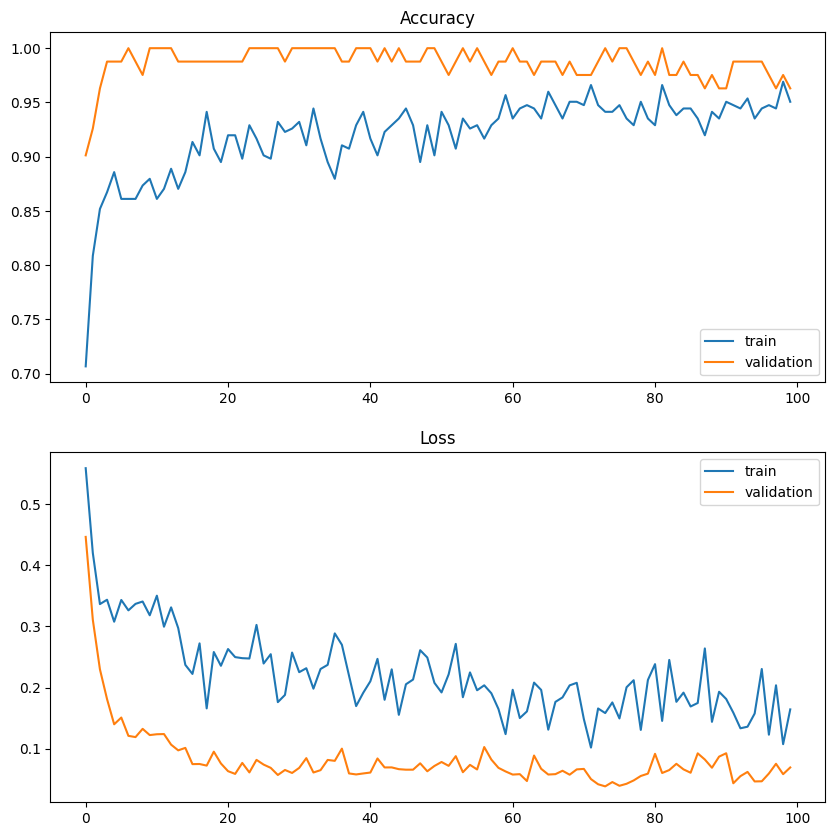

In [64]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend();

# Conclusions:
The initial analysis of the dataset shows that there are no missing values in most columns except for the "Unnamed: 32" column, which was dropped as it contained nullable data.
The target variable "diagnosis" was converted to binary encoding, with Malignant (M) represented as 1 and Benign (B) as 0.
Outliers were identified and removed using the Interquartile Range (IQR) method.

Various histograms were plotted to compare the distribution of features between Malignant and Benign tumors.
Pair plots were created for selected columns to visualize relationships between them.
A correlation matrix was generated to identify correlations between different features.

Two classification models, K-Nearest Neighbors (KNN) and Decision Tree, were trained on the dataset.
Evaluation metrics such as Accuracy, F1 Score, Precision, and Recall were computed for both models.
KNN outperformed the Decision Tree in terms of accuracy, F1 Score, and precision.

Grid search was performed to find the best hyperparameters for the KNN model.
The best parameters were found to be {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'} with a mean cross-validation accuracy of approximately 95.98%.

Two Multilayer Perceptron (MLP) models with different architectures were implemented using TensorFlow and Keras.
Model 1: 3 dense layers with 64, 32, and 1 neurons respectively.
Model 2: 5 dense layers with 256, 128, 64, 32, and 1 neurons respectively.

Both neural network models were trained and evaluated on the test set.
Model 1 achieved a test accuracy of approximately 97%.
Model 2, with a more complex architecture, also achieved a test accuracy of approximately 97%.

The KNN model and the simpler multy-layer neural network model (Model 1) performed similarly, achieving an accuracy of around 97% on the test set.
Further fine-tuning and experimentation with neural network architectures could potentially improve performance.